# 2 Support Vector Machine on Parkinsons Data Set
## 2.1 Logistic Regression Classfier & SVM Classfier

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = np.loadtxt(open("parkinsons.data","r"),delimiter=",",skiprows=1,usecols=range(1,24))
#读取CSV文件，分隔符为逗号，跳过第一行表头和第一列受试者名字，其余数值转换为float
tag=data[:,-7]
data=np.delete(data,-7,axis=1)#将分类标签和其他特征维度分开
X_train, X_test, y_train, y_test = train_test_split(data,tag,test_size=0.2,random_state=429)#划分数据集
scaler = StandardScaler()#例化数据标准化工具对象
X_train = scaler.fit_transform(X_train)#fit_transform函数计算训练集数据均值和方差并将训练集数据标准化
X_test = scaler.transform(X_test)#transform函数将测试集数据用同样的均值和方差标准化

from sklearn.linear_model import LogisticRegression

LogR=LogisticRegression(penalty='l1',solver='liblinear')#例化逻辑回归器，设定最大迭代次数
LogR.fit(X_train,y_train)#用训练集样本训练逻辑回归模型
print('Logistic Regression|training score:{:.3f}'.format(LogR.score(X_train,y_train)))#分别测试训练集、测试集准确率
print('Logistic Regression|testing score:{:.3f}'.format(LogR.score(X_test,y_test)))

from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='linear')#例化线性核函数的SVM训练器
clf.fit(X_train, y_train)#用训练集样本训练支持向量机
train_acc_baseline=clf.score(X_train,y_train)#设置分类baseline，为下一题做准备
test_acc_baseline=clf.score(X_test,y_test)
print('SVM|training score:{:.3f}'.format(train_acc_baseline))#分别测试训练集、测试集准确率
print('SVM|testing score:{:.3f}'.format(test_acc_baseline))

Logistic Regression|training score:0.885
Logistic Regression|testing score:0.821
SVM|training score:0.910
SVM|testing score:0.846


+ 分类器效果比较：两者均能达到较好的分类效果，从最终测试集上的分类准确率来看，SVM略优于Logistic Regression
+ 两者联系：SVM和Logistic Regression均是寻求一个优化的样本分类决策面。就核函数来说，SVM可以使用线性核函数、高斯核函数、Sigmoid核函数等等，Logistic Regression相当于使用Sigmoid核函数，因此Logistic Regression与使用Sigmoid核函数的SVM最为接近。就优化方法来说，Logistic Regression在梯度下降的过程中考虑所有点分类的误差，SVM只考虑对分类最关键的点（即支持向量），两者都有比较明确的理论基础，相比之下SVM计算较为简单，能够应对更加复杂的样本和核函数。

## 2.2 Quantitative Analysis on the Contribution of Each Feature

Without feature1|train_acc_loss=0.0128 test_acc_loss=0.0
Without feature2|train_acc_loss=0.0 test_acc_loss=-0.0256
Without feature3|train_acc_loss=0.0 test_acc_loss=0.0
Without feature4|train_acc_loss=0.0 test_acc_loss=0.0
Without feature5|train_acc_loss=0.0 test_acc_loss=0.0
Without feature6|train_acc_loss=0.0 test_acc_loss=0.0
Without feature7|train_acc_loss=0.0 test_acc_loss=0.0
Without feature8|train_acc_loss=0.0 test_acc_loss=0.0
Without feature9|train_acc_loss=0.0 test_acc_loss=0.0
Without feature10|train_acc_loss=0.0 test_acc_loss=0.0
Without feature11|train_acc_loss=0.0 test_acc_loss=0.0
Without feature12|train_acc_loss=-0.00641 test_acc_loss=0.0
Without feature13|train_acc_loss=-0.00641 test_acc_loss=0.0
Without feature14|train_acc_loss=0.0 test_acc_loss=0.0
Without feature15|train_acc_loss=0.0 test_acc_loss=0.0
Without feature16|train_acc_loss=0.00641 test_acc_loss=0.0
Without feature17|train_acc_loss=0.0256 test_acc_loss=0.0256
Without feature18|train_acc_loss=0.0128 test_ac

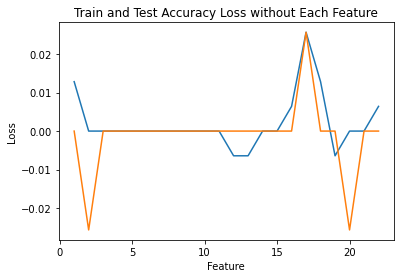

In [2]:
train_acc_loss=[]
test_acc_loss=[]
for i in range(np.shape(X_train)[1]):
    X_train_temp=np.delete(X_train,i,axis=1)#依次删去每一个维度的数据
    X_test_temp=np.delete(X_test,i,axis=1)
    clf.fit(X_train_temp, y_train)#用删去后的数据训练分类器
    train_dec=train_acc_baseline-clf.score(X_train_temp,y_train)#计算删除该维度数据后训练集分类准确率的损失
    test_dec=test_acc_baseline-clf.score(X_test_temp,y_test)#计算删除该维度数据后测试集分类准确率的损失
    train_acc_loss.append(train_dec)
    test_acc_loss.append(test_dec)
    print('Without feature{}|train_acc_loss={:.3} test_acc_loss={:.3}'.format(i+1,train_dec,test_dec))

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,np.shape(X_train)[1]+1),train_acc_loss,label='train_acc_loss')
plt.plot(range(1,np.shape(X_train)[1]+1),test_acc_loss,label='test_acc_loss')
plt.xlabel('Feature')
plt.ylabel('Loss')
plt.title('Train and Test Accuracy Loss without Each Feature')
print('The most important feature is feature NO.{}'.format(np.argmax(test_acc_loss)+1))

可以看到，依次删除每一个维度的数据后，分类准确率有不同程度的下降，有些维度被删去后分类准确率几乎没有变化。由于高维数据中不同维度的混叠程度不同，因此不同维度对于分类的贡献也不相同。比较发现删除第17个维度后分类准确率损失最大，因此该维度对于分类的贡献最大。

## 2.3 GridSearch for Best Parameters in SVM with Gaussian Kernel

best params on val data:
{'C': 10.0, 'gamma': 0.1}
performance of best params on test data:
0.9230769230769231


Text(0.5, 1.0, 'performance of all parameters on val data')

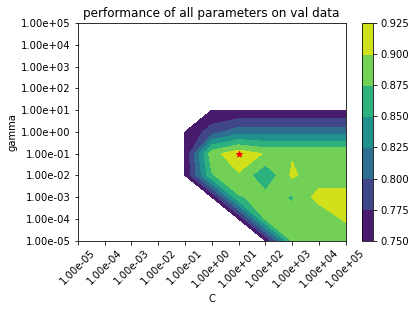

In [25]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='rbf')
parameters={'C':np.logspace(-5, 5, 11),'gamma':np.logspace(-5, 5, 11)}#以十倍增量对数空间取网格
clf=GridSearchCV(svc,param_grid=parameters,cv=5,n_jobs=-1,scoring='accuracy')#多线程网格搜索，取五折交叉验证
clf.fit(X_train,y_train)

print('best params on val data:')
print((clf.best_params_))
best_model=clf.best_estimator_#重建最佳分类器
print('performance of best params on test data:')
print((best_model.score(X_test,y_test)))#最佳分类器在测试集上验证

gridx,gridy=np.meshgrid(np.arange(len(parameters['C'])),np.arange(len(parameters['gamma'])))#形成坐标网格矩阵
gridz=clf.cv_results_['mean_test_score']#获取在各个网格上的分类准确率
gridz=np.reshape(gridz,[len(parameters['C']),len(parameters['gamma'])])
gridz=gridz.T

import math

plt.figure()
plt.contourf(gridx,gridy,gridz)#画出准确率等高线图
plt.colorbar()
plt.xticks(np.arange(len(parameters['C'])), ['%.2e' % c for c in parameters['C']], rotation=45)#设置坐标轴刻度
plt.yticks(np.arange(len(parameters['gamma'])),['%.2e' % gamma for gamma in parameters['gamma']])
plt.scatter(math.log10(clf.best_params_['C'])+5,math.log10(clf.best_params_['gamma'])+5,marker='*',c='red')#用红星标注出最佳参数网格点
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('performance of all parameters on val data')

+ 根据网格参数搜索可以得到最佳超参数的取值。在由参数范数惩罚的模型中，惩罚强度超参数对于模型的表现有重要作用；同时在利用核函数的过程中，核函数中的参数也有着至关重要的作用。对于本题这种计算量较小的机器学习模型，可以使用网格搜索的方法进行最优参数搜索。在深度学习模型中，学习率、各层输入输出通道数、卷积核尺寸、步长与padding等超参数都或多或少影响着网络的表现，此时简单的网格搜索可能不再适用，需要更多经验性或自适应超参数的高级算法。

## 总结：
本题中利用真实受试者的数据集基本完整体现了构建机器学习模型的过程：
+ 首先对比了逻辑回归分类器和SVM分类器的分类表现，确定大致算法方向。对于实际工程问题，选择合适的算法并在准确度和时间开销上取折中是重要的。
+ 其次对于高维特征，评估了各维度在分类中的重要程度。现实数据往往具有很高的维度，并非所有维度的数据对于分类都是用作用的，选取关键维度可以在降低计算量的同时保证准确率，对于构建有效的机器学习模型至关重要。
+ 最后进行了模型超参数的选择，机器学习模型中不可学习的超参数往往需要研究人员根据经验和所面对的问题的特性进行选取。选取时结合一定的搜索方法能够比较有效地选取合适的超参数。